In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Ciencia de Dados/Aprendizado de maquina/marketing.csv", delimiter='\t')

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactive="all"

In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
#Spending variable creation
data['Age']=2014-data['Year_Birth']

data['Spending']= data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
#Seniority variable creation
last_date = datetime.date(2014,10, 4)
data['Seniority'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
data['Seniority'] = pd.to_numeric(data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30
data=data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
data['Marital_Status']=data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

data['Children']=data['Kidhome']+data['Teenhome']
data['Has_child'] = np.where(data.Children> 0, 'Has child', 'No child')
data['Children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)
data=data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})


data=data[['Age','Education','Marital_Status','Income','Spending','Seniority','Has_child','Children','Wines','Fruits','Meat','Fish','Sweets','Gold']]
data.head()

,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,57,Postgraduate,Alone,58138.0,1617,25.333333,No child,No child,635,88,546,172,88,88
1,60,Postgraduate,Alone,46344.0,27,7.000000,Has child,2 children,11,1,6,2,1,6
2,49,Postgraduate,In couple,71613.0,776,13.633333,No child,No child,426,49,127,111,21,42
3,30,Postgraduate,In couple,26646.0,53,7.866667,Has child,1 child,11,4,20,10,3,5
4,33,Postgraduate,In couple,58293.0,422,8.600000,Has child,1 child,173,43,118,46,27,15


In [ ]:
#data.drop('ID',axis='columns', inplace=True)

In [7]:
data.dropna(axis=0, how='any', thresh=None, subset=['Income'], inplace=True)

In [8]:
#OUTLIERS
data=data[data['Income']<600000]

In [9]:
data.head()

,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,57,Postgraduate,Alone,58138.0,1617,25.333333,No child,No child,635,88,546,172,88,88
1,60,Postgraduate,Alone,46344.0,27,7.000000,Has child,2 children,11,1,6,2,1,6
2,49,Postgraduate,In couple,71613.0,776,13.633333,No child,No child,426,49,127,111,21,42
3,30,Postgraduate,In couple,26646.0,53,7.866667,Has child,1 child,11,4,20,10,3,5
4,33,Postgraduate,In couple,58293.0,422,8.600000,Has child,1 child,173,43,118,46,27,15


In [10]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

Eleger 2 ou mais atributos quantitativos.

In [11]:
data_customer = data[['Income','Spending']].values

Gerar o dendograma com um ou mais métodos hierarquicos aglomerativos.

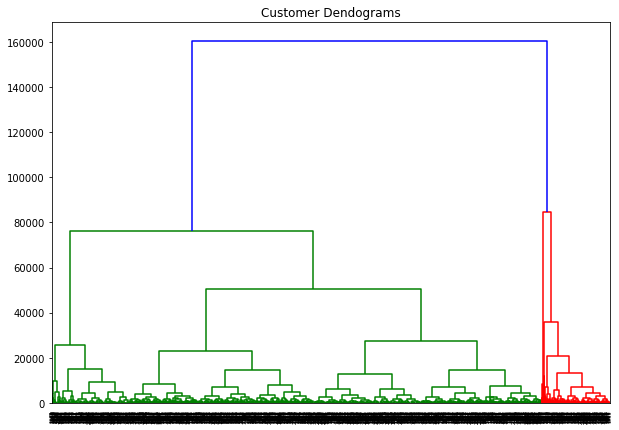

In [12]:
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data_customer, method='complete'))  

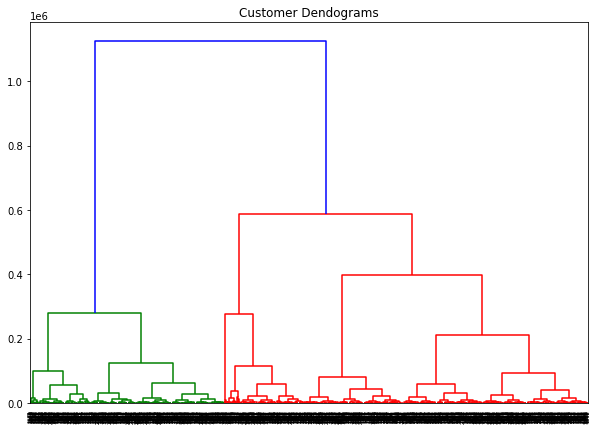

In [13]:
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data_customer, method='ward'))  

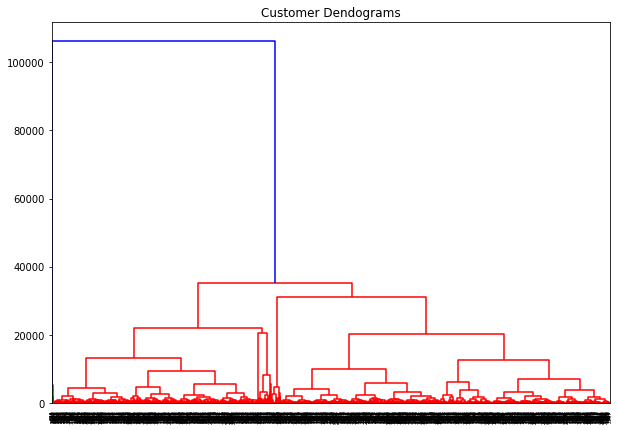

In [14]:
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data_customer, method='average'))  

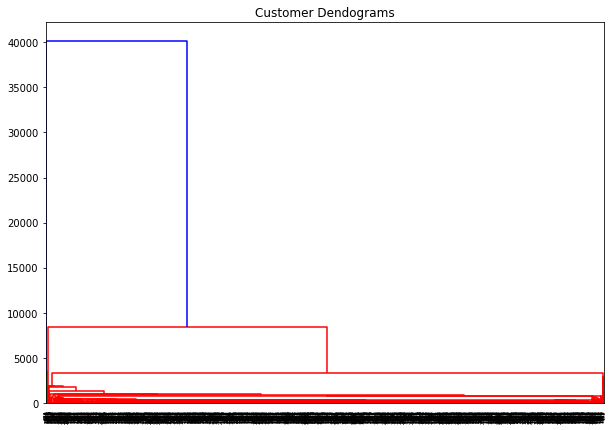

In [15]:
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data_customer, method='single'))  

Gerar o agrupamento para pelo menos um algoritmo hierárquico aglomerativo.

In [16]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
#options: ward, complete, average, single
cluster.fit_predict(data_customer)   

array([1, 3, 1, ..., 1, 1, 3])

Encontrar uma solução ótima de agrupamento a partir da visualização do dendograma e se necessário utilizar o SSE.

Text(0, 0.5, 'Spending')

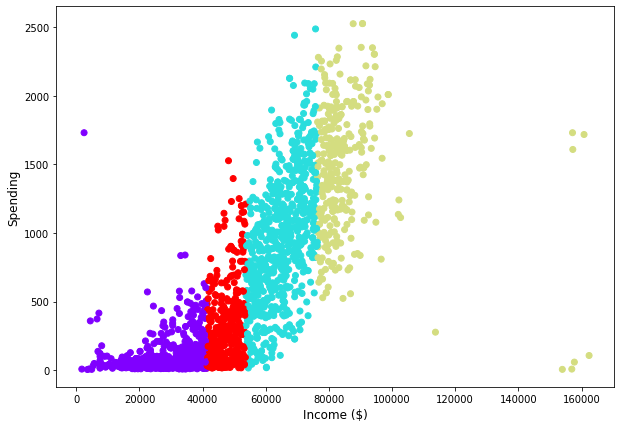

In [17]:
plt.figure(figsize=(10, 7)) 
plt.scatter(data_customer[:,0], data_customer[:,1], c=cluster.labels_, cmap='rainbow')  
plt.xlabel("Income ($)", fontsize=12)
plt.ylabel("Spending", fontsize=12)

Analisar/Interpretar as partições geradas.



Quanto mais a pessoa recebe mais ela gasta
